In [18]:
import numpy as np
import matplotlib.pyplot as plt

### 1. zadatak

In [4]:
# Distribution samplers
# bernoulli
def bernoulli(p=0.5, size=1):
    return np.random.binomial(1, p, size=size)
# uniform
def uniform(a=0, b=1, size=1):
    return np.random.uniform(a, b, size=size)
# Clipped normall, explicitly in [0,1]
def clipped_normal(mu=0.5, sigma=0.15, size=1):
    samples = np.random.normal(mu, sigma, size=size)
    return np.clip(samples, 0, 1)

distributions = {
    'bernoulli': bernoulli,
    'uniform': uniform,
    'clipped_normal': clipped_normal
}

In [5]:
def hoeffding(n, eps=0.01):
    return 2*np.exp(-2*n*eps**2)

In [ ]:
T = 1000
Ns = [10,25,50,100,500,1000]
eps = 0.01

all_means = {dist: {N: [] for N in Ns} for dist in distributions.keys()}
results = {dist: {'Ns': [], 'empirical_probs': []} for dist in distributions.keys()}

for dist_name, sampler in distributions.items():
    for N in Ns:
        means = []
        for i in range(T):
            sample = sampler(size=N)
            mean = np.mean(sample)
            means.append(mean)
        means = np.array(means)
        
        all_means[dist_name][N] = means
        
        diffs = np.abs(means - 0.5)
        count_exceed = np.sum(diffs > eps)
        empirical_prob = count_exceed / T
        prob = hoeffding(N, eps)
        
        results[dist_name]['Ns'].append(N)
        results[dist_name]['empirical_probs'].append(empirical_prob)
        
        print(f"Distribution: {dist_name}, N: {N}, Empirical Prob: {empirical_prob:.4f}, Hoeffding Bound: {prob:.4f}")

Distribution: bernoulli, N: 10, Empirical Prob: 0.7820, Hoeffding Bound: 1.9960
Distribution: bernoulli, N: 25, Empirical Prob: 1.0000, Hoeffding Bound: 1.9900
Distribution: bernoulli, N: 50, Empirical Prob: 0.8940, Hoeffding Bound: 1.9801
Distribution: bernoulli, N: 100, Empirical Prob: 0.9030, Hoeffding Bound: 1.9604
Distribution: bernoulli, N: 500, Empirical Prob: 0.7020, Hoeffding Bound: 1.8097
Distribution: bernoulli, N: 1000, Empirical Prob: 0.5480, Hoeffding Bound: 1.6375
Distribution: uniform, N: 10, Empirical Prob: 0.9160, Hoeffding Bound: 1.9960
Distribution: uniform, N: 25, Empirical Prob: 0.8590, Hoeffding Bound: 1.9900
Distribution: uniform, N: 50, Empirical Prob: 0.8170, Hoeffding Bound: 1.9801
Distribution: uniform, N: 100, Empirical Prob: 0.7500, Hoeffding Bound: 1.9604
Distribution: uniform, N: 500, Empirical Prob: 0.4420, Hoeffding Bound: 1.8097
Distribution: uniform, N: 1000, Empirical Prob: 0.2860, Hoeffding Bound: 1.6375
Distribution: clipped_normal, N: 10, Empiric

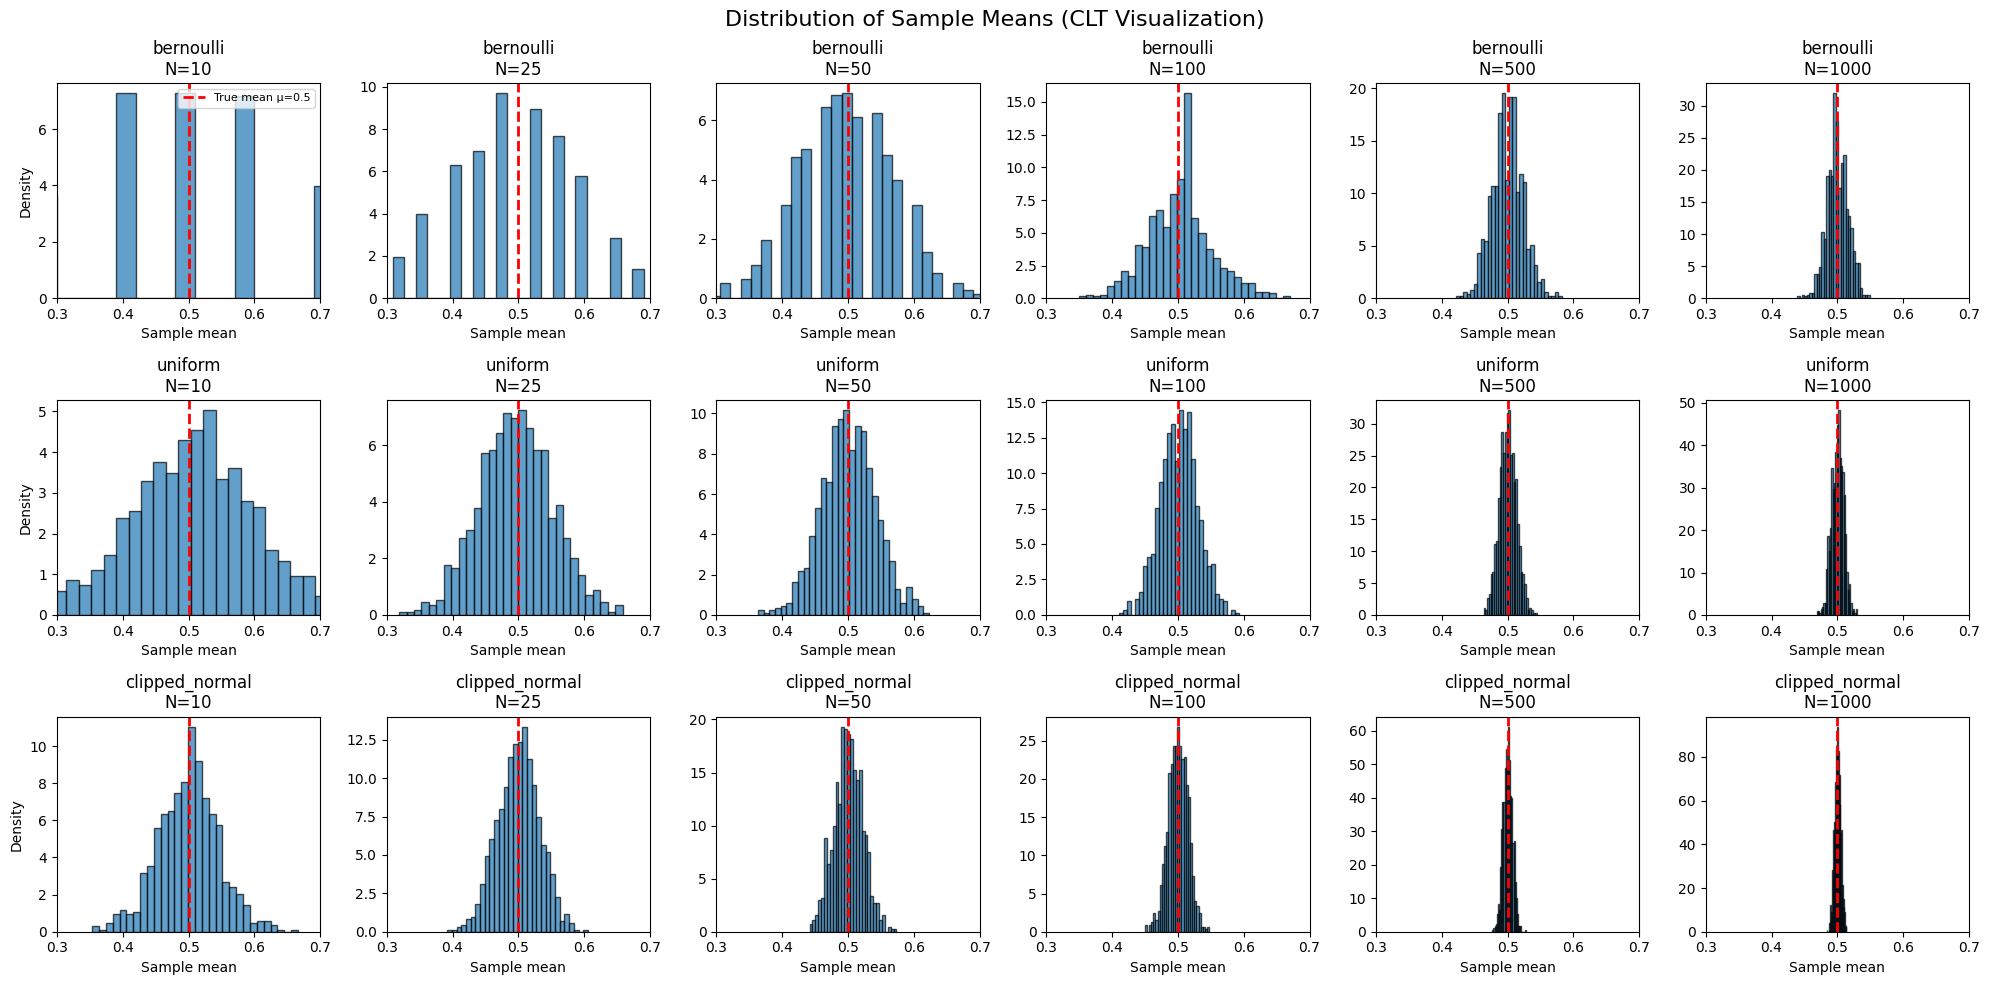

In [22]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
fig.suptitle('Distribution of Sample Means (CLT Visualization)', fontsize=16)

for i, (dist_name, dist_means) in enumerate(all_means.items()):
    for j, N in enumerate(Ns):
        ax = axes[i, j]
        ax.hist(dist_means[N], bins=30, density=True, alpha=0.7, edgecolor='black')
        ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='True mean μ=0.5')
        ax.set_title(f'{dist_name}\nN={N}')
        ax.set_xlabel('Sample mean')
        if j == 0:
            ax.set_ylabel('Density')
        if i == 0 and j == 0:
            ax.legend(fontsize=8)
        ax.set_xlim(0.3, 0.7)

plt.tight_layout()
plt.show()

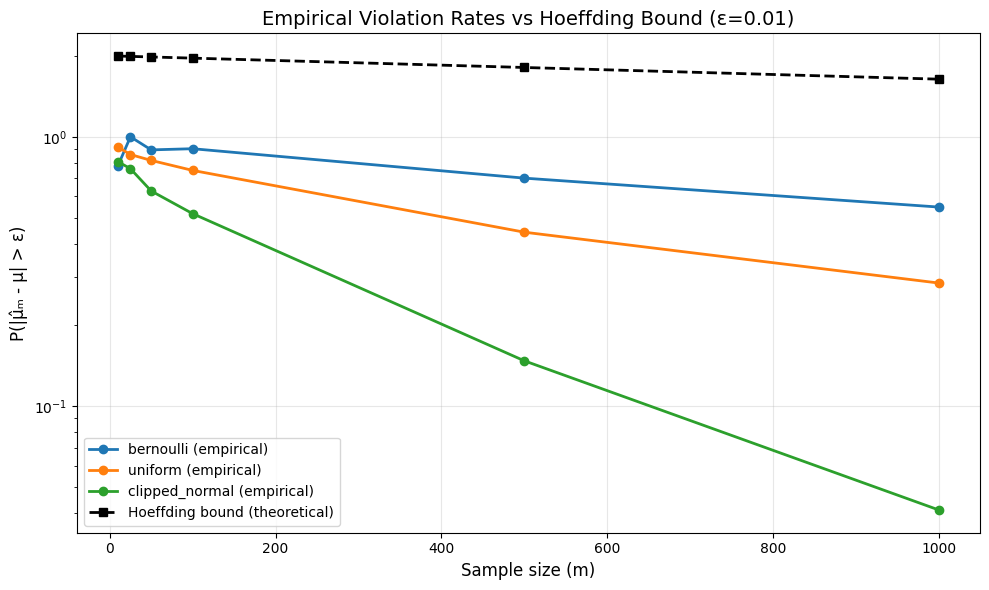

In [23]:
plt.figure(figsize=(10, 6))

for dist_name in distributions.keys():
    plt.plot(results[dist_name]['Ns'], results[dist_name]['empirical_probs'], 
             marker='o', label=f'{dist_name} (empirical)', linewidth=2)

hoeffding_bounds = [hoeffding(N, eps) for N in Ns]
plt.plot(Ns, hoeffding_bounds, marker='s', linestyle='--', 
         color='black', label='Hoeffding bound (theoretical)', linewidth=2)

plt.yscale('log')
plt.xlabel('Sample size (m)', fontsize=12)
plt.ylabel('P(|μ̂ₘ - μ| > ε)', fontsize=12)
plt.title(f'Empirical Violation Rates vs Hoeffding Bound (ε={eps})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. zadatak

In [24]:
def sample_complexity_UC(card_H, delta=0.05, eps=0.01):
    return int((1/(2*eps**2)) * np.log(2*card_H/delta))

def epsilon_UC(card_H, m=1000, delta=0.05):
    return np.sqrt((1/(2*m)) * np.log(2*card_H/delta))

def sample_complexity_PAC(card_H, delta=0.05, eps=0.01):
    return int((1/eps) * (np.log(card_H/delta)))

def epsilon_PAC(card_H, m=1000, delta=0.05):
    return (1/m) * (np.log(card_H/delta))

#### a) Uzoračka složenost vs |H|

ε=0.05, UC: m=737 | PAC: m=59 for |H|=1
ε=0.05, UC: m=876 | PAC: m=73 for |H|=2
ε=0.05, UC: m=957 | PAC: m=81 for |H|=3
ε=0.05, UC: m=1015 | PAC: m=87 for |H|=4
ε=0.05, UC: m=1059 | PAC: m=92 for |H|=5
ε=0.05, UC: m=1096 | PAC: m=95 for |H|=6
ε=0.05, UC: m=1126 | PAC: m=98 for |H|=7
ε=0.05, UC: m=1153 | PAC: m=101 for |H|=8
ε=0.05, UC: m=1177 | PAC: m=103 for |H|=9
ε=0.05, UC: m=1198 | PAC: m=105 for |H|=10
ε=0.05, UC: m=1217 | PAC: m=107 for |H|=11
ε=0.05, UC: m=1234 | PAC: m=109 for |H|=12
ε=0.05, UC: m=1250 | PAC: m=111 for |H|=13
ε=0.05, UC: m=1265 | PAC: m=112 for |H|=14
ε=0.05, UC: m=1279 | PAC: m=114 for |H|=15
ε=0.05, UC: m=1292 | PAC: m=115 for |H|=16
ε=0.05, UC: m=1304 | PAC: m=116 for |H|=17
ε=0.05, UC: m=1315 | PAC: m=117 for |H|=18
ε=0.05, UC: m=1326 | PAC: m=118 for |H|=19
ε=0.05, UC: m=1336 | PAC: m=119 for |H|=20
ε=0.05, UC: m=1346 | PAC: m=120 for |H|=21
ε=0.05, UC: m=1355 | PAC: m=121 for |H|=22
ε=0.05, UC: m=1364 | PAC: m=122 for |H|=23
ε=0.05, UC: m=1373 | PAC: m=12

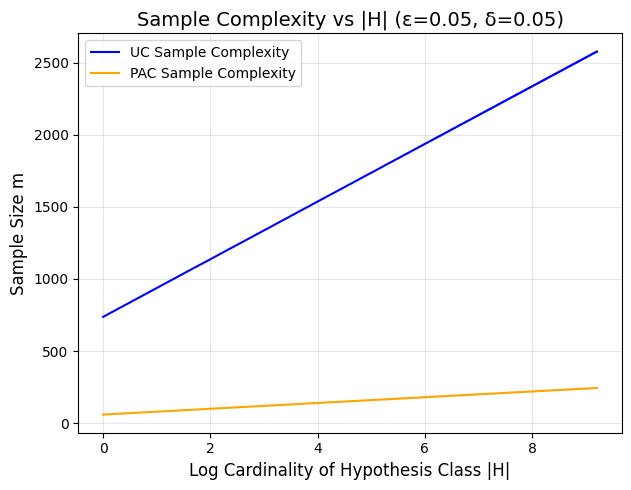

ε=0.1, UC: m=184 | PAC: m=29 for |H|=1
ε=0.1, UC: m=219 | PAC: m=36 for |H|=2
ε=0.1, UC: m=239 | PAC: m=40 for |H|=3
ε=0.1, UC: m=253 | PAC: m=43 for |H|=4
ε=0.1, UC: m=264 | PAC: m=46 for |H|=5
ε=0.1, UC: m=274 | PAC: m=47 for |H|=6
ε=0.1, UC: m=281 | PAC: m=49 for |H|=7
ε=0.1, UC: m=288 | PAC: m=50 for |H|=8
ε=0.1, UC: m=294 | PAC: m=51 for |H|=9
ε=0.1, UC: m=299 | PAC: m=52 for |H|=10
ε=0.1, UC: m=304 | PAC: m=53 for |H|=11
ε=0.1, UC: m=308 | PAC: m=54 for |H|=12
ε=0.1, UC: m=312 | PAC: m=55 for |H|=13
ε=0.1, UC: m=316 | PAC: m=56 for |H|=14
ε=0.1, UC: m=319 | PAC: m=57 for |H|=15
ε=0.1, UC: m=323 | PAC: m=57 for |H|=16
ε=0.1, UC: m=326 | PAC: m=58 for |H|=17
ε=0.1, UC: m=328 | PAC: m=58 for |H|=18
ε=0.1, UC: m=331 | PAC: m=59 for |H|=19
ε=0.1, UC: m=334 | PAC: m=59 for |H|=20
ε=0.1, UC: m=336 | PAC: m=60 for |H|=21
ε=0.1, UC: m=338 | PAC: m=60 for |H|=22
ε=0.1, UC: m=341 | PAC: m=61 for |H|=23
ε=0.1, UC: m=343 | PAC: m=61 for |H|=24
ε=0.1, UC: m=345 | PAC: m=62 for |H|=25
ε=0.1, UC

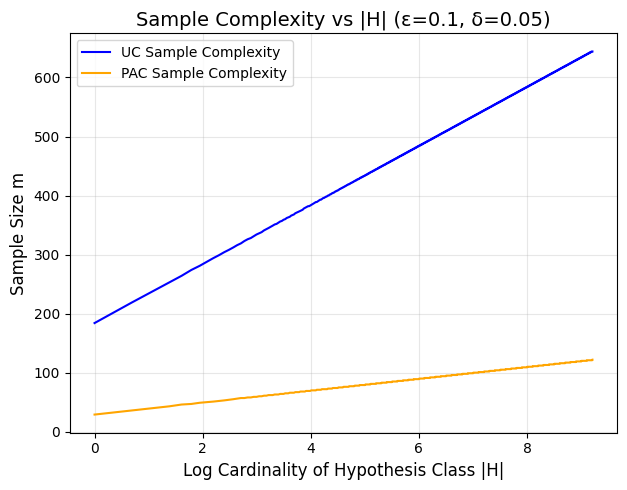

In [31]:
epss = [0.05, 0.1]
delta = 0.05

for eps in epss:
    points_m_UC = []
    points_m_PAC = []

    for i in range(1, 10000 + 1):
        m_UC = sample_complexity_UC(card_H=i, delta=delta, eps=eps)
        
        m_PAC = sample_complexity_PAC(card_H=i, delta=delta, eps=eps)

        points_m_UC.append(m_UC)
        points_m_PAC.append(m_PAC)

        print(f"ε={eps}, UC: m={m_UC} | PAC: m={m_PAC} for |H|={i}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    log_card_H = np.log(range(1, 10000 + 1))
    plt.plot(log_card_H, points_m_UC, label='UC Sample Complexity', color='blue')
    plt.plot(log_card_H, points_m_PAC, label='PAC Sample Complexity', color='orange')
    plt.xlabel('Log Cardinality of Hypothesis Class |H|', fontsize=12)
    plt.ylabel('Sample Size m', fontsize=12)
    plt.title(f'Sample Complexity vs |H| (ε={eps}, δ={delta})', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#### b) Eps vs uzoračka složenost

|H|=1000.0, UC: ε=0.2302 | PAC: ε=0.0990 for m=100
|H|=1000.0, UC: ε=0.2290 | PAC: ε=0.0981 for m=101
|H|=1000.0, UC: ε=0.2279 | PAC: ε=0.0971 for m=102
|H|=1000.0, UC: ε=0.2268 | PAC: ε=0.0962 for m=103
|H|=1000.0, UC: ε=0.2257 | PAC: ε=0.0952 for m=104
|H|=1000.0, UC: ε=0.2246 | PAC: ε=0.0943 for m=105
|H|=1000.0, UC: ε=0.2236 | PAC: ε=0.0934 for m=106
|H|=1000.0, UC: ε=0.2225 | PAC: ε=0.0926 for m=107
|H|=1000.0, UC: ε=0.2215 | PAC: ε=0.0917 for m=108
|H|=1000.0, UC: ε=0.2205 | PAC: ε=0.0909 for m=109
|H|=1000.0, UC: ε=0.2195 | PAC: ε=0.0900 for m=110
|H|=1000.0, UC: ε=0.2185 | PAC: ε=0.0892 for m=111
|H|=1000.0, UC: ε=0.2175 | PAC: ε=0.0884 for m=112
|H|=1000.0, UC: ε=0.2165 | PAC: ε=0.0876 for m=113
|H|=1000.0, UC: ε=0.2156 | PAC: ε=0.0869 for m=114
|H|=1000.0, UC: ε=0.2146 | PAC: ε=0.0861 for m=115
|H|=1000.0, UC: ε=0.2137 | PAC: ε=0.0854 for m=116
|H|=1000.0, UC: ε=0.2128 | PAC: ε=0.0846 for m=117
|H|=1000.0, UC: ε=0.2119 | PAC: ε=0.0839 for m=118
|H|=1000.0, UC: ε=0.2110 | PAC:

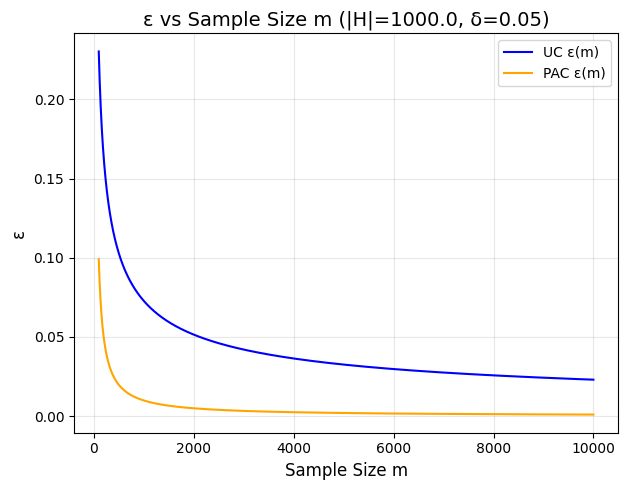

|H|=10000.0, UC: ε=0.2540 | PAC: ε=0.1221 for m=100
|H|=10000.0, UC: ε=0.2527 | PAC: ε=0.1209 for m=101
|H|=10000.0, UC: ε=0.2515 | PAC: ε=0.1197 for m=102
|H|=10000.0, UC: ε=0.2502 | PAC: ε=0.1185 for m=103
|H|=10000.0, UC: ε=0.2490 | PAC: ε=0.1174 for m=104
|H|=10000.0, UC: ε=0.2478 | PAC: ε=0.1162 for m=105
|H|=10000.0, UC: ε=0.2467 | PAC: ε=0.1152 for m=106
|H|=10000.0, UC: ε=0.2455 | PAC: ε=0.1141 for m=107
|H|=10000.0, UC: ε=0.2444 | PAC: ε=0.1130 for m=108
|H|=10000.0, UC: ε=0.2433 | PAC: ε=0.1120 for m=109
|H|=10000.0, UC: ε=0.2421 | PAC: ε=0.1110 for m=110
|H|=10000.0, UC: ε=0.2410 | PAC: ε=0.1100 for m=111
|H|=10000.0, UC: ε=0.2400 | PAC: ε=0.1090 for m=112
|H|=10000.0, UC: ε=0.2389 | PAC: ε=0.1080 for m=113
|H|=10000.0, UC: ε=0.2379 | PAC: ε=0.1071 for m=114
|H|=10000.0, UC: ε=0.2368 | PAC: ε=0.1061 for m=115
|H|=10000.0, UC: ε=0.2358 | PAC: ε=0.1052 for m=116
|H|=10000.0, UC: ε=0.2348 | PAC: ε=0.1043 for m=117
|H|=10000.0, UC: ε=0.2338 | PAC: ε=0.1034 for m=118
|H|=10000.0,

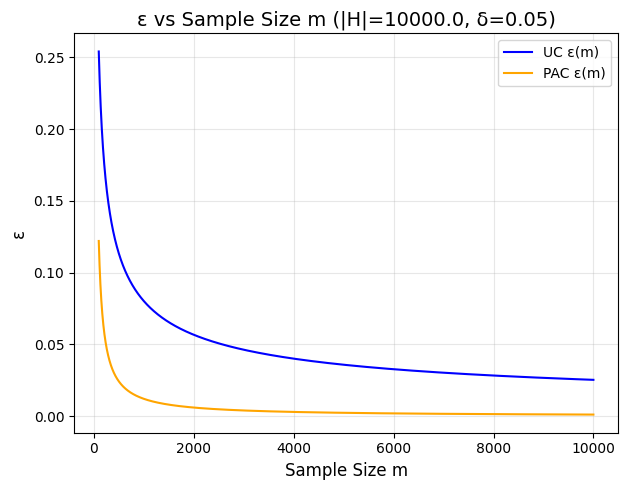

|H|=1000000.0, UC: ε=0.2958 | PAC: ε=0.1681 for m=100
|H|=1000000.0, UC: ε=0.2944 | PAC: ε=0.1664 for m=101
|H|=1000000.0, UC: ε=0.2929 | PAC: ε=0.1648 for m=102
|H|=1000000.0, UC: ε=0.2915 | PAC: ε=0.1632 for m=103
|H|=1000000.0, UC: ε=0.2901 | PAC: ε=0.1616 for m=104
|H|=1000000.0, UC: ε=0.2887 | PAC: ε=0.1601 for m=105
|H|=1000000.0, UC: ε=0.2873 | PAC: ε=0.1586 for m=106
|H|=1000000.0, UC: ε=0.2860 | PAC: ε=0.1571 for m=107
|H|=1000000.0, UC: ε=0.2847 | PAC: ε=0.1557 for m=108
|H|=1000000.0, UC: ε=0.2834 | PAC: ε=0.1542 for m=109
|H|=1000000.0, UC: ε=0.2821 | PAC: ε=0.1528 for m=110
|H|=1000000.0, UC: ε=0.2808 | PAC: ε=0.1515 for m=111
|H|=1000000.0, UC: ε=0.2795 | PAC: ε=0.1501 for m=112
|H|=1000000.0, UC: ε=0.2783 | PAC: ε=0.1488 for m=113
|H|=1000000.0, UC: ε=0.2771 | PAC: ε=0.1475 for m=114
|H|=1000000.0, UC: ε=0.2759 | PAC: ε=0.1462 for m=115
|H|=1000000.0, UC: ε=0.2747 | PAC: ε=0.1449 for m=116
|H|=1000000.0, UC: ε=0.2735 | PAC: ε=0.1437 for m=117
|H|=1000000.0, UC: ε=0.2723 

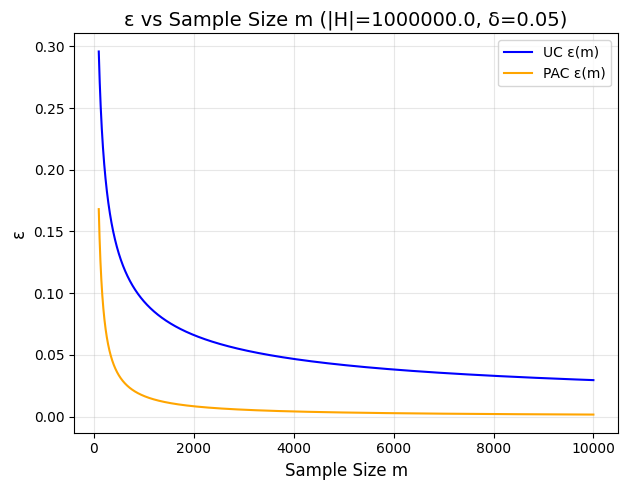

In [32]:
M = range(100,10000)
card_Hs = [1e3, 1e4, 1e6]
delta = 0.05

for card_H in card_Hs:
    points_eps_UC = []
    points_eps_PAC = []

    for m in M:
        eps_UC = epsilon_UC(card_H=card_H, m=m, delta=delta)
        
        eps_PAC = epsilon_PAC(card_H=card_H, m=m, delta=delta)

        points_eps_UC.append(eps_UC)
        points_eps_PAC.append(eps_PAC)

        print(f"|H|={card_H}, UC: ε={eps_UC:.4f} | PAC: ε={eps_PAC:.4f} for m={m}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(M, points_eps_UC, label='UC ε(m)', color='blue')
    plt.plot(M, points_eps_PAC, label='PAC ε(m)', color='orange')
    plt.xlabel('Sample Size m', fontsize=12)
    plt.ylabel('ε', fontsize=12)
    plt.title(f'ε vs Sample Size m (|H|={card_H}, δ={delta})', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#### c) Uzoračka složenost vs točnost

|H|=1000.0, UC: m=52983 for ε=0.01
|H|=1000.0, UC: m=13245 for ε=0.02
|H|=1000.0, UC: m=5887 for ε=0.03
|H|=1000.0, UC: m=3311 for ε=0.04
|H|=1000.0, UC: m=2119 for ε=0.05
|H|=1000.0, UC: m=1471 for ε=0.060000000000000005
|H|=1000.0, UC: m=1081 for ε=0.06999999999999999
|H|=1000.0, UC: m=827 for ε=0.08
|H|=1000.0, UC: m=654 for ε=0.09
|H|=1000.0, UC: m=529 for ε=0.09999999999999999
|H|=1000.0, UC: m=437 for ε=0.11
|H|=1000.0, UC: m=367 for ε=0.12
|H|=1000.0, UC: m=313 for ε=0.13
|H|=1000.0, UC: m=270 for ε=0.14
|H|=1000.0, UC: m=235 for ε=0.15000000000000002
|H|=1000.0, UC: m=206 for ε=0.16
|H|=1000.0, UC: m=183 for ε=0.17
|H|=1000.0, UC: m=163 for ε=0.18000000000000002
|H|=1000.0, UC: m=146 for ε=0.19
|H|=1000.0, UC: m=132 for ε=0.2
|H|=1000.0, UC: m=120 for ε=0.21000000000000002
|H|=1000.0, UC: m=109 for ε=0.22
|H|=1000.0, UC: m=100 for ε=0.23
|H|=1000.0, UC: m=91 for ε=0.24000000000000002
|H|=1000.0, UC: m=84 for ε=0.25
|H|=1000.0, UC: m=78 for ε=0.26
|H|=1000.0, UC: m=72 for ε=0.27

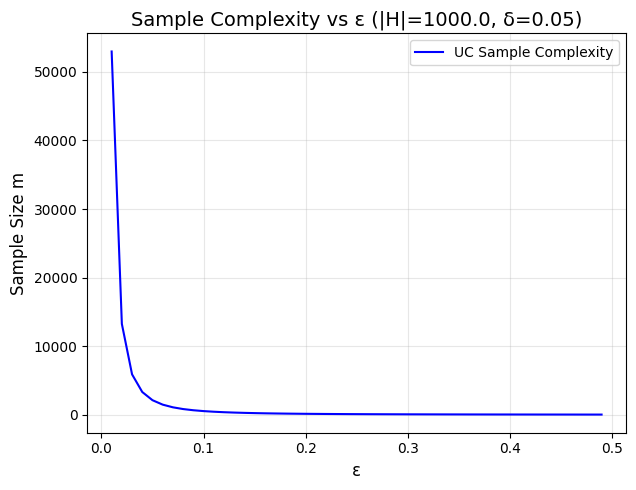

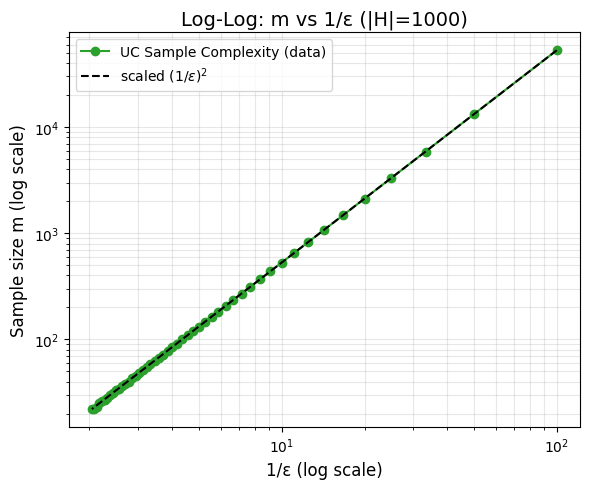

|H|=10000.0, UC: m=64496 for ε=0.01
|H|=10000.0, UC: m=16124 for ε=0.02
|H|=10000.0, UC: m=7166 for ε=0.03
|H|=10000.0, UC: m=4031 for ε=0.04
|H|=10000.0, UC: m=2579 for ε=0.05
|H|=10000.0, UC: m=1791 for ε=0.060000000000000005
|H|=10000.0, UC: m=1316 for ε=0.06999999999999999
|H|=10000.0, UC: m=1007 for ε=0.08
|H|=10000.0, UC: m=796 for ε=0.09
|H|=10000.0, UC: m=644 for ε=0.09999999999999999
|H|=10000.0, UC: m=533 for ε=0.11
|H|=10000.0, UC: m=447 for ε=0.12
|H|=10000.0, UC: m=381 for ε=0.13
|H|=10000.0, UC: m=329 for ε=0.14
|H|=10000.0, UC: m=286 for ε=0.15000000000000002
|H|=10000.0, UC: m=251 for ε=0.16
|H|=10000.0, UC: m=223 for ε=0.17
|H|=10000.0, UC: m=199 for ε=0.18000000000000002
|H|=10000.0, UC: m=178 for ε=0.19
|H|=10000.0, UC: m=161 for ε=0.2
|H|=10000.0, UC: m=146 for ε=0.21000000000000002
|H|=10000.0, UC: m=133 for ε=0.22
|H|=10000.0, UC: m=121 for ε=0.23
|H|=10000.0, UC: m=111 for ε=0.24000000000000002
|H|=10000.0, UC: m=103 for ε=0.25
|H|=10000.0, UC: m=95 for ε=0.26
|H

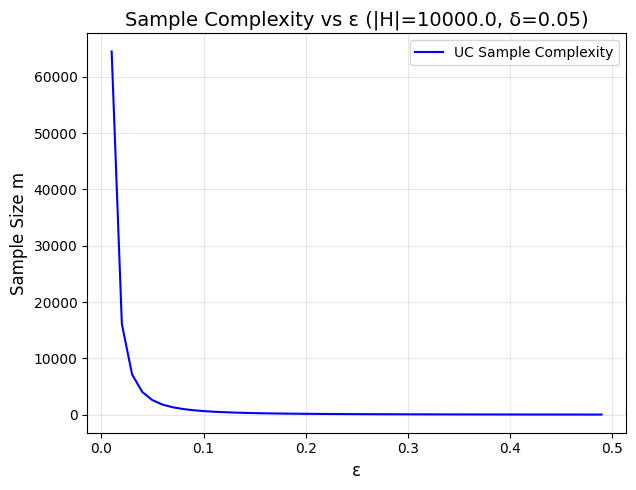

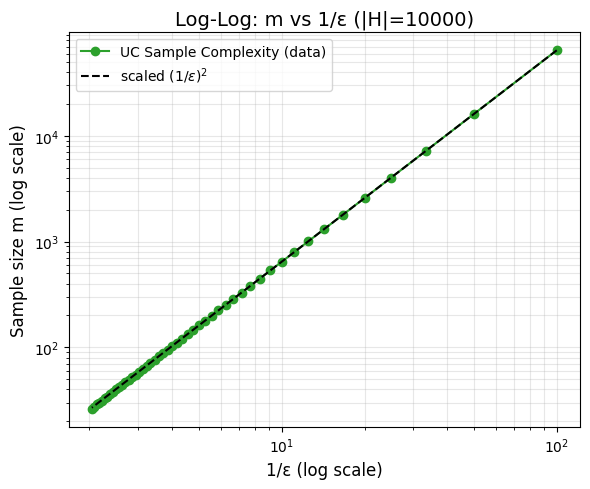

|H|=1000000.0, UC: m=87521 for ε=0.01
|H|=1000000.0, UC: m=21880 for ε=0.02
|H|=1000000.0, UC: m=9724 for ε=0.03
|H|=1000000.0, UC: m=5470 for ε=0.04
|H|=1000000.0, UC: m=3500 for ε=0.05
|H|=1000000.0, UC: m=2431 for ε=0.060000000000000005
|H|=1000000.0, UC: m=1786 for ε=0.06999999999999999
|H|=1000000.0, UC: m=1367 for ε=0.08
|H|=1000000.0, UC: m=1080 for ε=0.09
|H|=1000000.0, UC: m=875 for ε=0.09999999999999999
|H|=1000000.0, UC: m=723 for ε=0.11
|H|=1000000.0, UC: m=607 for ε=0.12
|H|=1000000.0, UC: m=517 for ε=0.13
|H|=1000000.0, UC: m=446 for ε=0.14
|H|=1000000.0, UC: m=388 for ε=0.15000000000000002
|H|=1000000.0, UC: m=341 for ε=0.16
|H|=1000000.0, UC: m=302 for ε=0.17
|H|=1000000.0, UC: m=270 for ε=0.18000000000000002
|H|=1000000.0, UC: m=242 for ε=0.19
|H|=1000000.0, UC: m=218 for ε=0.2
|H|=1000000.0, UC: m=198 for ε=0.21000000000000002
|H|=1000000.0, UC: m=180 for ε=0.22
|H|=1000000.0, UC: m=165 for ε=0.23
|H|=1000000.0, UC: m=151 for ε=0.24000000000000002
|H|=1000000.0, UC: m

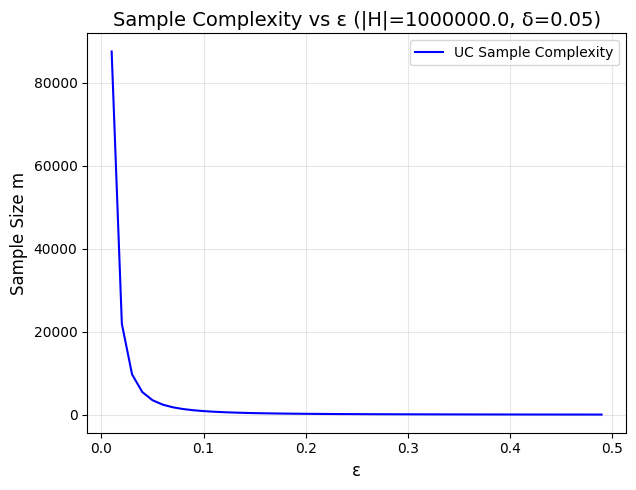

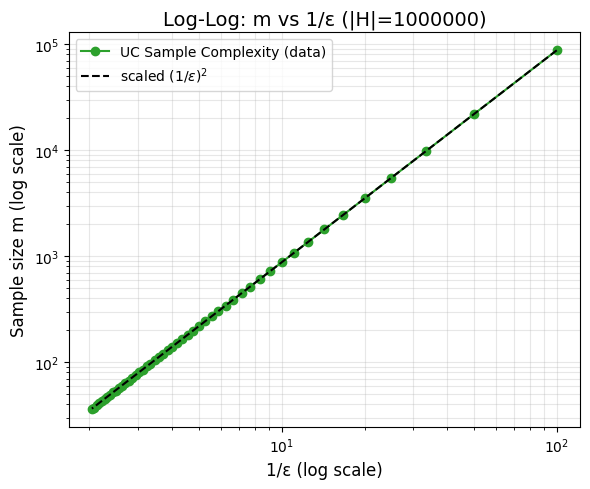

In [33]:
card_Hs = [1e3, 1e4, 1e6]
epss = np.arange(0.01, 0.5, 0.01)
delta = 0.05

for card_H in card_Hs:
    points_m_UC = []

    for eps in epss:
        m_UC = sample_complexity_UC(card_H=card_H, delta=delta, eps=eps)
    
        points_m_UC.append(m_UC)

        print(f"|H|={card_H}, UC: m={m_UC} for ε={eps}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epss, points_m_UC, label='UC Sample Complexity', color='blue')
    plt.xlabel('ε', fontsize=12)
    plt.ylabel('Sample Size m', fontsize=12)
    plt.title(f'Sample Complexity vs ε (|H|={card_H}, δ={delta})', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # log-log plot to illustrate m ∝ (1/ε)^2
    plt.figure(figsize=(6,5))
    x = 1.0 / epss
    y = np.array(points_m_UC)

    plt.loglog(x, y, marker='o', linestyle='-', color='tab:green', label='UC Sample Complexity (data)')
    # scaled reference quadratic curve through first point
    ref = y[0] * (x / x[0])**2
    plt.loglog(x, ref, linestyle='--', color='black', label='scaled $(1/\\varepsilon)^2$')

    plt.xlabel('1/ε (log scale)', fontsize=12)
    plt.ylabel('Sample size m (log scale)', fontsize=12)
    plt.title(f'Log-Log: m vs 1/ε (|H|={int(card_H)})', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', alpha=0.3)
    plt.tight_layout()
    plt.show()

#### d) Diskretizacijski trik

d=10, UC: m=89460, PAC: m=8932
d=11, UC: m=98332, PAC: m=9819
d=12, UC: m=107205, PAC: m=10706
d=13, UC: m=116077, PAC: m=11593
d=14, UC: m=124949, PAC: m=12481
d=15, UC: m=133822, PAC: m=13368
d=16, UC: m=142694, PAC: m=14255
d=17, UC: m=151566, PAC: m=15142
d=18, UC: m=160438, PAC: m=16030
d=19, UC: m=169311, PAC: m=16917
d=20, UC: m=178183, PAC: m=17804
d=21, UC: m=187055, PAC: m=18691
d=22, UC: m=195928, PAC: m=19578
d=23, UC: m=204800, PAC: m=20466
d=24, UC: m=213672, PAC: m=21353
d=25, UC: m=222544, PAC: m=22240
d=26, UC: m=231417, PAC: m=23127
d=27, UC: m=240289, PAC: m=24015
d=28, UC: m=249161, PAC: m=24902
d=29, UC: m=258034, PAC: m=25789
d=30, UC: m=266906, PAC: m=26676
d=31, UC: m=275778, PAC: m=27563
d=32, UC: m=284650, PAC: m=28451
d=33, UC: m=293523, PAC: m=29338
d=34, UC: m=302395, PAC: m=30225
d=35, UC: m=311267, PAC: m=31112
d=36, UC: m=320139, PAC: m=32000
d=37, UC: m=329012, PAC: m=32887
d=38, UC: m=337884, PAC: m=33774
d=39, UC: m=346756, PAC: m=34661
d=40, UC: m=35

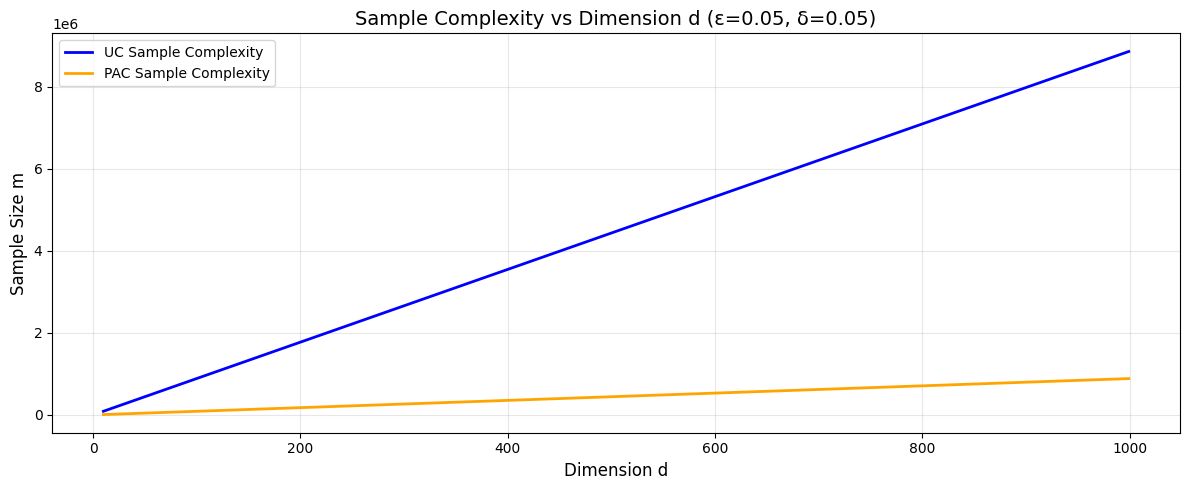

In [36]:
ds = np.arange(10, 1000)  # Reduced range for practical computation
eps = delta = 0.05

# Instead of computing card_H = 2^(64*d), compute log(card_H) directly
# log(2^(64*d)) = 64*d*log(2)
log_card_H = lambda d: 64 * d * np.log(2)

ms_UC = []
ms_PAC = []

for d in ds:
    # For UC: m = (1/(2*eps^2)) * log(2*card_H/delta)
    # log(2*card_H/delta) = log(2) + log(card_H) - log(delta)
    log_term_UC = np.log(2) + log_card_H(d) - np.log(delta)
    m_UC = int((1/(2*eps**2)) * log_term_UC)
    
    # For PAC: m = (1/eps) * log(card_H/delta)
    # log(card_H/delta) = log(card_H) - log(delta)
    log_term_PAC = log_card_H(d) - np.log(delta)
    m_PAC = int((1/eps) * log_term_PAC)
    
    print(f"d={d}, UC: m={m_UC}, PAC: m={m_PAC}")
    ms_UC.append(m_UC)
    ms_PAC.append(m_PAC)

plt.figure(figsize=(12, 5))
plt.plot(ds, ms_UC, label='UC Sample Complexity', color='blue', linewidth=2)
plt.plot(ds, ms_PAC, label='PAC Sample Complexity', color='orange', linewidth=2)
plt.xlabel('Dimension d', fontsize=12)
plt.ylabel('Sample Size m', fontsize=12)
plt.title(f'Sample Complexity vs Dimension d (ε={eps}, δ={delta})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
from typing import Optional, Tuple, List, TypeAlias, Callable

In [40]:
hypothesis: TypeAlias = Callable[[np.ndarray], np.ndarray]
loss: TypeAlias = Callable[[hypothesis, tuple], float]

In [ ]:
class FiniteDiscreteDistribution:
    def __init__(self,
                 domain: Optional[Tuple[float, float, float]] = None,
                 dimensions: int = 2,
                 num_points: int = 1000,
                 labeling_fun: Optional[hypothesis] = None,
                 noise_level: float = 0.0):
        self.dimensions = dimensions
        self.num_points = num_points
        self.labeling_fun = labeling_fun
        self.noise_level = noise_level
        
        if domain is not None:
            min_val, max_val, step = domain
            coords = [np.arange(min_val, max_val, step) for _ in range(dimensions)]
            mesh = np.meshgrid(*coords)
            all_points = np.stack(mesh, axis=-1).reshape(-1, dimensions)
            indices = np.random.choice(len(all_points), size=num_points, replace=False)
            self.points = all_points[indices]
        else:
            self.points = np.random.rand(num_points, dimensions)
        
        if labeling_fun is not None:
            self.labels = labeling_fun(self.points)
        else:
            self.labels = np.zeros(num_points)
        
        if noise_level > 0.0:
            num_noisy = int(noise_level * num_points)
            flip_indices = np.random.choice(num_points, size=num_noisy, replace=False)
            self.labels[flip_indices] = 1 - self.labels[flip_indices]  # assume binary labels 0/1
    
    def sample(self, m: int) -> List[Tuple[np.ndarray, float]]:
        """Sample m points with replacement along with their labels"""
        indices = np.random.choice(self.num_points, size=m, replace=True)
        return [(self.points[i], self.labels[i]) for i in indices]
    
    def expected_risk(self, h: hypothesis, loss_fn: loss) -> float:
        """Compute true risk (average loss over all points)"""
        losses = [loss_fn(h, (x, y)) for x, y in zip(self.points, self.labels)]
        return np.mean(losses)